# <center> Визуализация на Python
## <center>Часть 1. Matplotlib


В начале как всегда настроим окружение: импортируем все необходимые библиотеки и немного настроим дефолтное отображение картинок.

In [1]:
!ls

02. Pandas practice.ipynb
03. Binomial distribution.ipynb
03. Matrix_algebra.ipynb
04. Height distribution.ipynb
05. T-Critery.ipynb
06. Visualisation practice.ipynb
README.md
datasets
pairplot.png


In [2]:
# для установки библиотек
# ! pip3 install seaborn
# ! pip3 install plotly
# ! pip3 install ggplot
# ! pip3 install matplotlib

In [3]:
# Python 2 and Python 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# Отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'е
%pylab inline
%config InlineBackend.figure_format = 'svg';

# увелчим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6, 3

import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('datasets/Video_Games_Sales_as_at_22_Dec_2016.csv')
df.shape

(16719, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
df = df.dropna()
df.shape

(6825, 16)

In [7]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [8]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [9]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre',
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


In [10]:
[x for x in df.columns if 'Sales' in x]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [11]:
df1 = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum()
df1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985,0.00,0.03,0.00,0.01,0.03
1988,0.00,0.02,0.00,0.01,0.03
1992,0.02,0.00,0.00,0.00,0.03
1994,0.39,0.26,0.53,0.08,1.27
1996,7.91,6.88,4.06,1.24,20.10


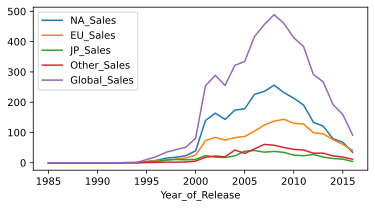

In [12]:
df1.plot();

В этом случае мы сконцентрировались на отображении трендов продаж в разных регионах.

C помощью параметра kind можно изменить тип графика, например, на bar chart. Matplotlib позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметра rot отвечает за угол наклона подписей к оси x.

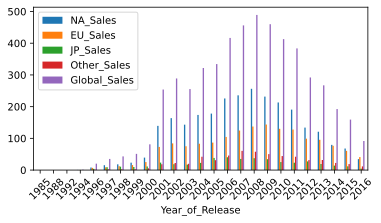

In [13]:
df1.plot(kind='bar', rot=45); # rot=45 означает повернуть подписи на 45 градусов

Или можем сделать stacked bar chart, чтобы показать и динамику продаж и их разюиение по рынкам.

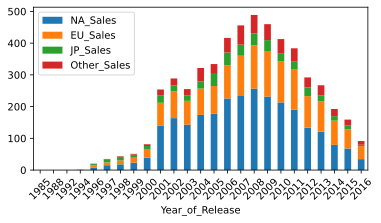

In [14]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))].plot(kind='bar', rot=45, stacked=True);

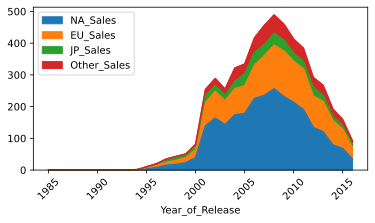

In [15]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))].plot(kind='area', rot=45, stacked=True);

Еще один часто встречающийся тип графиков - это гистограммы. Посмотрим на **распределение оценок критиков**.

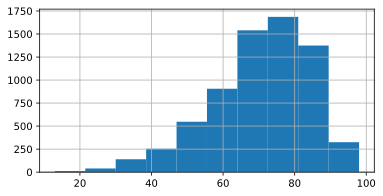

In [16]:
df.Critic_Score.hist();

Text(0, 0.5, 'games')

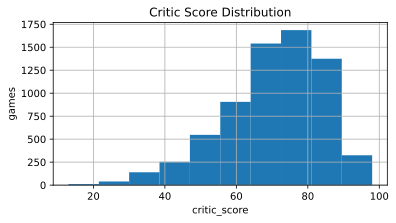

In [17]:
ax = df.Critic_Score.hist()
ax.set_title('Critic Score Distribution')
ax.set_xlabel('critic_score')
ax.set_ylabel('games')

У гистограмм можно контролировать, на сколько групп мы разбиваем распределение с помощью параметра `bins`.git/

Text(0, 0.5, 'games')

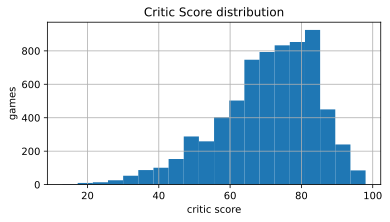

In [18]:
ax = df.Critic_Score.hist(bins=20)
ax.set_title('Critic Score distribution')
ax.set_xlabel('critic score')
ax.set_ylabel('games')

In [19]:
top_developers_df = df.groupby('Developer')[['Global_Sales']].sum().sort_values('Global_Sales', ascending=False).head(10)
top_developers_df

,Global_Sales
Developer,
Nintendo,529.90
EA Sports,145.93
EA Canada,131.46
Rockstar North,119.47
Capcom,114.52
Treyarch,101.37
Ubisoft Montreal,101.24
Ubisoft,94.53
EA Tiburon,79.77


In [20]:
top_developers_df.style.bar(color='green')

,Global_Sales
Developer,
Nintendo,529.900000
EA Sports,145.930000
EA Canada,131.460000
Rockstar North,119.470000
Capcom,114.520000
Treyarch,101.370000
Ubisoft Montreal,101.240000
Ubisoft,94.530000
EA Tiburon,79.770000


### Полезные ссылки
 * [Документация pandas.plot](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
 * [Документация pandas.style](http://pandas.pydata.org/pandas-docs/stable/style.html)
 * [Документация matplotlib](https://matplotlib.org/)

## <center>Часть 2. Seaborn

Теперь давайте перейдем к библиотеке seaborn. Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Если просто добавить в код import seaborn, то картинки станут гораздо симпатичнее. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

Познакомимся с первым таким "сложным" типом графиков **pair plot (scatter plot matrix)**. Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки. 

In [21]:
import seaborn as sns

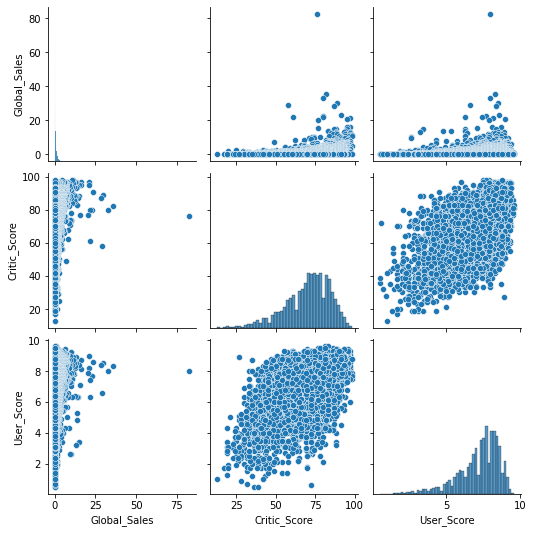

In [22]:
# с svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png'
sns_plot = sns.pairplot(df[['Global_Sales', 'Critic_Score', 'User_Score']]);
sns_plot.savefig('pairplot.png')